In [1]:
import pandas as pd

pd.options.display.max_rows = 10

restavracije = pd.read_csv('restavracije/restavracije.csv')

tipi = pd.read_csv('restavracije/tipi.csv')

%matplotlib inline


# Projektna naloga iz Programiranja 1
## Analiza ljubljanskih restavracij



In [2]:
restavracije[["ime", "rating", "glasovi"]]

,ime,rating,glasovi
0,Taman Organic,4.5,86
1,Monstera bistro,4.5,646
2,Capriccio Ristopizza,4.5,266
3,Restavracija Strelec,4.5,724
4,Restaurant Compa,4.5,487
...,...,...,...
576,Acapulco lounge bar,-1.0,0
577,Ginger bar,-1.0,0
578,Yortie,-1.0,0
579,Kulinaric Hisa Somrak,-1.0,0


In [3]:
tipi

,ime,tip
0,Taman Organic,"""Healthy"""
1,Taman Organic,"""International"""
2,Monstera bistro,"""European"""
3,Monstera bistro,"""Contemporary"""
4,Capriccio Ristopizza,"""Italian"""
...,...,...
997,Ginger bar,"""Cafe"""
998,Yortie,"""Deli"""
999,Kulinaric Hisa Somrak,"""European"""
1000,Roma,"""Italian"""


### Vprašanje 1a : Kateri tip hrane se najpogosteje pojavlja pri najbolje ocenjenih restavracijah?

In [4]:
najbolje_ocenjene = restavracije[(restavracije.rating >= 4.5) & (restavracije.glasovi >= 50)]
# najbolje ocenjene restavracije, ki imajo povprečno oceno nad 4.5 ter nad 50 glasov

imena = najbolje_ocenjene[["ime"]] 
# imena najbolje ocenjenih

tabela_najboljših = pd.merge(imena, tipi)
# združi imena najbolje ocenjenih z njihovimi tipi

končna_verzija = tabela_najboljših.groupby("tip")
# grupiramo po tipih

končna_verzija.size().sort_values()
# preštejemo tipe in število razvrstimo po velikosti

tip
"African"           1
"Soups"             1
"Lebanese"          1
"Fusion"            1
"Chinese"           1
                   ..
"International"    17
"Slovenian"        17
"Healthy"          17
"Mediterranean"    18
"European"         28
Length: 31, dtype: int64

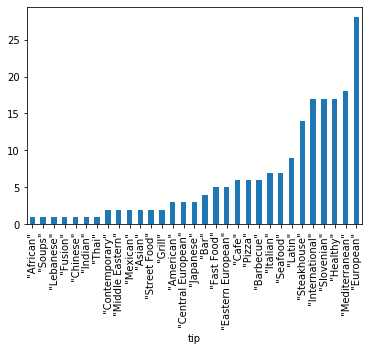

In [5]:
končna_verzija.size().sort_values().plot.bar()
# graf prikazuje kateri tip hrane se največkrat pojavi pri najbolje ocenjenih restavracijah

#### ODGOVOR : Najbolje ocenjene restavracije so največkrat tipa: European, Mediterranean, Healthy, Slovenian, International, Healthy.

### Vprašanje 1b : Kateri tip hrane se najpogosteje pojavlja pri najslabše ocenjenih restavracijah?

In [6]:
najslabše_ocenjene = restavracije[(restavracije.rating < 3.0) & (restavracije.rating > 0) & (restavracije.glasovi >= 1)]
# najbolje ocenjene restavracije, ki imajo povprečno oceno pod 3.0 ter imajo vsaj en glas

imena2 = najslabše_ocenjene[["ime"]] 
# imena najslabše ocenjenih

tabela_najslabših = pd.merge(imena2, tipi)
# združi imena najslabše ocenjenih z njihovimi tipi

končna_verzija2 = tabela_najslabših.groupby("tip")
# grupiramo po tipih

končna_verzija2.size().sort_values()
# preštejemo tipe in število razvrstimo po velikosti

tip
"Asian"        1
"Bar"          1
"Cafe"         1
"Chinese"      1
"Croatian"     1
              ..
"Tunisian"     1
"European"     3
"Italian"      3
"Slovenian"    3
"Pizza"        5
Length: 15, dtype: int64

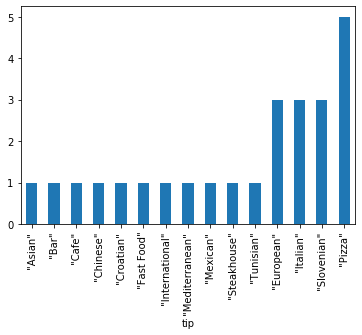

In [7]:
končna_verzija2.size().sort_values().plot.bar()
# graf prikazuje kateri tip hrane se največkrat pojavi pri najslabše ocenjenih restavracijah

#### ODGOVOR : Najslabše ocenjene restavracije so največkrat tipa: Pizza, Slovenian, Italian, European.

### Vprašanje 2 : Kakšna je povezava med številom glasov in oceno restavracije?

In [8]:
primerjalna_tabela = restavracije[["rating", "glasovi"]]
# tabela z oceno in številom glasov

primerjalna_pozitivna = primerjalna_tabela[(primerjalna_tabela.rating > 0) & (primerjalna_tabela.glasovi > 0)]
# tabela brez neocenjenih restavracij

primerjalna_pozitivna.sort_values(['rating', 'glasovi'], ascending=[False, False])
# uredimo padajoče po oceni in številu glasov

grupirana = primerjalna_pozitivna.groupby("rating")
# grupiramo po oceni

grupirana.glasovi.mean()
# povrpečno število glasov glede na posamezno oceno

rating
1.0      1.500000
2.0     16.250000
2.5     18.500000
3.0     18.380952
3.5    109.875000
4.0    110.404372
4.5    195.875000
5.0     11.125000
Name: glasovi, dtype: float64

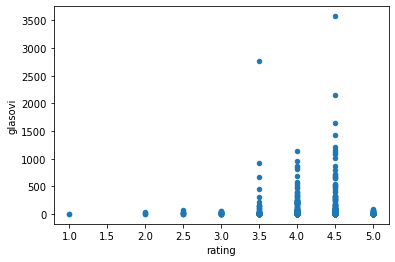

In [9]:
primerjalna_pozitivna.plot.scatter('rating', 'glasovi')
# razsevni diagram prikazuje povezavo med devma spremenljivkama

#### ODGOVOR : Največ ljudi bo restavracijo ocenilo z oceno 4.5, najmanj pa z oceno 1.0.

### Vprašanje 3 : Kateri tipi restavracij so največkrat ocenjeni?

In [10]:
tabela_glasov = restavracije[["ime", "glasovi"]]

tabela_pozitivna = tabela_glasov[(tabela_glasov.glasovi > 0)]
# restavracije, ki so dobile kakšen glas

podatki = pd.merge(tabela_pozitivna, tipi)
# tabela števila glasov za tipe

podatki_skrajšano = podatki[["glasovi", "tip"]]

podatki2 = podatki_skrajšano.groupby("tip")

podatki2.glasovi.mean().sort_values()
# povprečno število glasov vsakega tipa


tip
"German"                1.000000
"Brew Pub"              2.000000
"Spanish"               2.500000
"Tunisian"              6.000000
"French"                6.000000
                         ...    
"Steakhouse"          229.833333
"Mediterranean"       266.033898
"American"            358.181818
"Eastern European"    361.000000
"Contemporary"        401.333333
Name: glasovi, Length: 50, dtype: float64

#### ODGOVOR : Največkrat ocenjene so v povprečju restavracije sledečih tipov : Contemporary, Eastern European, American.


### Vprašanje 4 : Najbolj pogost tip restavracij v Ljubljani?

In [11]:
vsi_tipi = tipi.groupby("tip").size().sort_values()
# preštejemo restavracije s posameznim tipom

vsi_tipi

tip
"Lebanese"            1
"Tunisian"            1
"Hawaiian"            1
"Hungarian"           1
"South American"      1
                   ... 
"Bar"                58
"Pizza"              75
"Italian"            83
"Slovenian"          98
"European"          190
Length: 52, dtype: int64

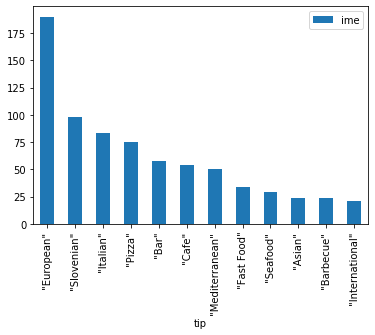

In [12]:
vsi_tipi = tipi.groupby("tip").count()
# združi in prešteje posamezne tipe restavracij

urejeni = vsi_tipi.sort_values(["ime"], ascending=[False])

urejeni2 = urejeni[urejeni.ime > 20]
# zaradi preglednosti grafa izberemo samo najšogostejše

urejeni2.plot.bar()


#### ODGOVOR : V Ljubljani bomo najpogosteje naleteli na restavracije tipa : European, Slovenian, Italian, Pizza, Bar.